<a href="https://colab.research.google.com/github/JonathanRakotomalala/MachineLearning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Rakotomalala Jonathan

# I

# Importing data




In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heartdisease.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [278]:
#data preprocessing
#remove the row with na

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


#Logistic Regression

TenYearCHD = 1 if the patient got heart disease ten years after the data collectioning, if not it's 0.

In [279]:
x=data.drop('TenYearCHD',axis=1)
y=data['TenYearCHD']
import statsmodels.formula.api as smf

riskmodel = smf.logit(formula = "TenYearCHD ~ male + age+ education +  currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose ", data = data)
binary = riskmodel.fit()


y_pred = (binary.predict(x) >= 0.5).astype(int)
from sklearn.metrics import accuracy_score
score1 =accuracy_score(y,y_pred)
print("Accuracy of binary logit:", score1)


Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7
Accuracy of binary logit: 0.8564004376367614


In [280]:
binary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.1174
Time:                        00:30:40   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.3222      0.715    -11.632      0.000      -9.725      -6.920
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.0023      0.001      2.062      0.039       0.000       0.005
sysBP               0.0154      0.004      4.043      0.000       0.008       0.023
diaBP              -0.0041      0.006     -0.642      0.521      -0.017       0.008
BMI                 0.0066      0.013      0.518      0.605      -0.018       0.032
heartRate          -0.0032      0.004     -0.772      0.440      -0.012       0.005
glucose             0.0071      0.002      3.189      0.001       0.003       0.012
===================================================================================
"""

glucose, sysBP,totChol,cigsPerDay,male,age are significant coefficient that increase the risk of heart disease

In [281]:
#exponentiation
coef=binary.params
print(np.exp(coef))

Intercept          0.000243
male               1.742111
age                1.065510
education          0.953613
currentSmoker      1.073447
cigsPerDay         1.018091
BPMeds             1.176160
prevalentStroke    2.000710
prevalentHyp       1.264451
diabetes           1.040250
totChol            1.002327
sysBP              1.015517
diaBP              0.995876
BMI                1.006625
heartRate          0.996756
glucose            1.007149
dtype: float64


if glucose increase by one the odds of having a heart disease ten year after is increased by 0.7%.

In [282]:
import seaborn as sb
corre = data.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

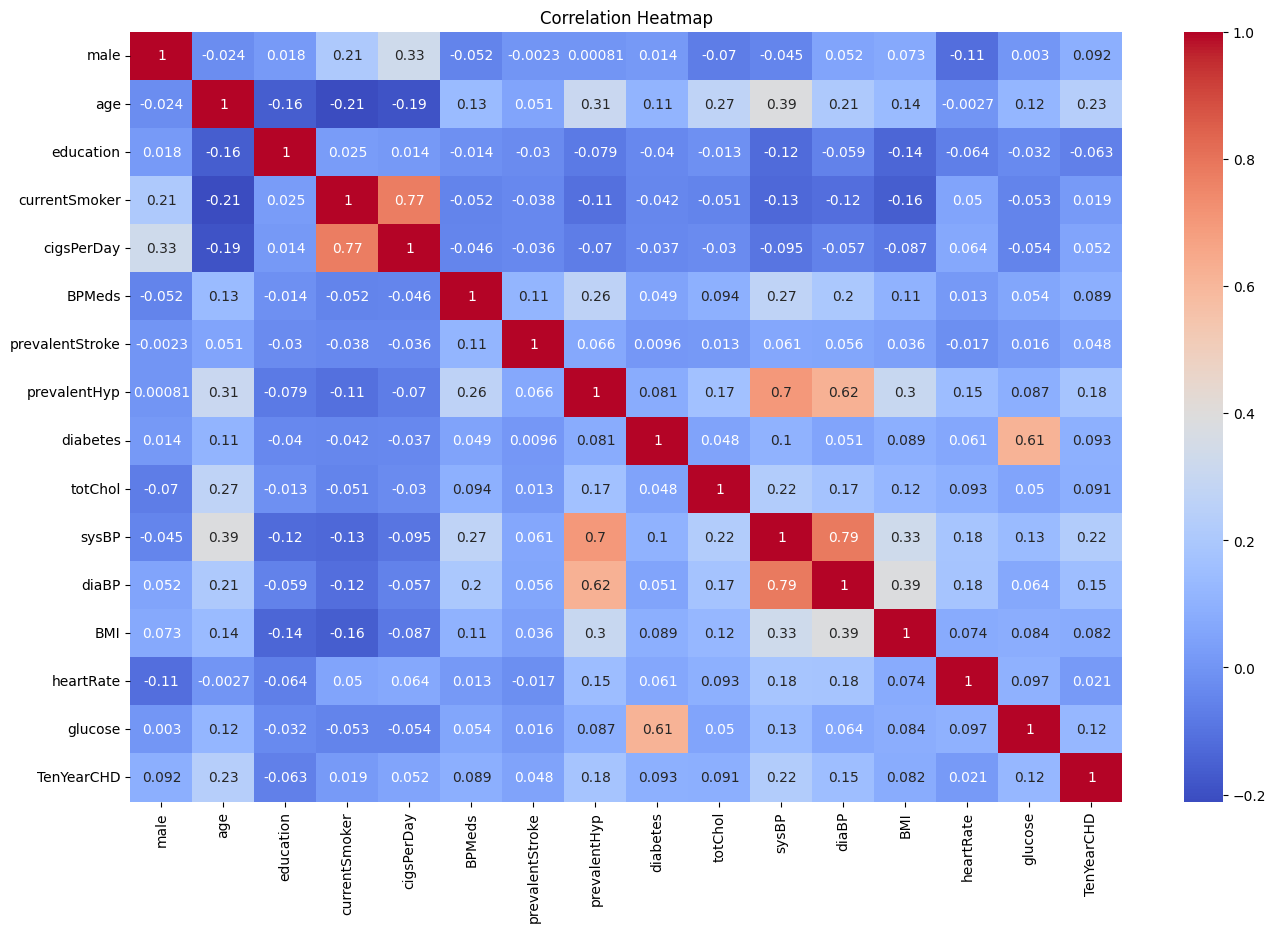

In [283]:
# prompt: heatmap of correlation
plt.figure(figsize=(16, 10))
sb.heatmap(corre, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')



It clearly shows that glucose is correlated to TenyearCHD


# KNN



In [284]:
# prompt: create knn model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) #minkowski is a hybrid of different methods,
#i.e. eucladian, mahanttan, then we define using p. We can't define Mahanttan or Eucladian directly using python code.
x=data.iloc[:,:-1].values
y=data['TenYearCHD']
knn.fit(x,y)


KNeighborsClassifier(n_neighbors=3)

In [285]:
#generate random values of x to test knn.predict

import random
# Assuming x has shape (n_samples, n_features)
n_features = x.shape[1]
random_x = [[random.random() for _ in range(n_features)]]

prediction = knn.predict(random_x)
print(prediction)


[0]


In [286]:
#train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y, random_state=42)

knn = KNeighborsClassifier (n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

score2=knn.score( x_test,y_test)
print("Accuracy of KNN:", score2)

Accuracy of KNN: 0.8422971741112124


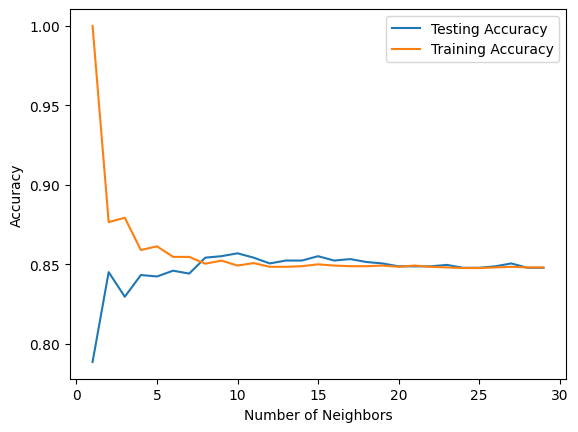

In [287]:
#view accuracy by number of neighbors
import matplotlib.pyplot as plt
neighbors = np.arange(1,30) #create an array from 1 to 30
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test) #this is a loop

plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 31, 5.0))
plt.show()


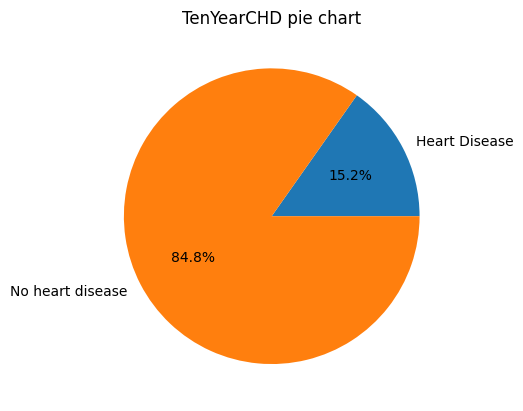

(3656,)

In [288]:
ob=sum(data["TenYearCHD"])
nob=np.shape(data["TenYearCHD"])[0]-ob
nb=[ob,nob]
data["TenYearCHD"]
plt.title("TenYearCHD pie chart")
plt.pie(nb,labels=["Heart Disease", "No heart disease"],autopct='%0.1f%%')
plt.show()
np.shape(data["TenYearCHD"])


# Decision Tree

In [289]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [290]:
predict_dtc = dt2.predict(x_test)
predict_dtc

array([0, 0, 0, ..., 0, 0, 0])

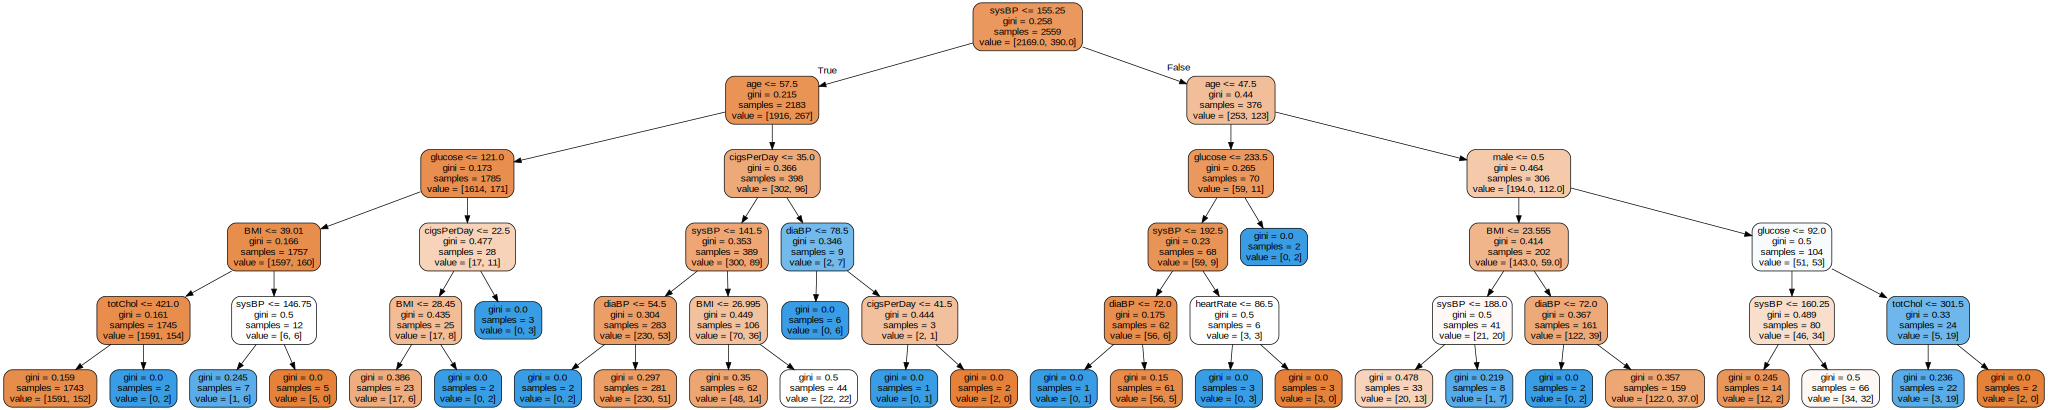

In [291]:
# prompt: decision tree with each node of label of column name
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import the function
import graphviz

# Get the feature names from the DataFrame
feature_names = data.columns[:-1].tolist()  # Exclude the target column 'TenYearCHD'

# Create the decision tree classifier
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train, y_train)

# Export the decision tree to a dot file with feature names
dot2_data = export_graphviz(dt2, out_file="tree2.dot", filled=True, rounded=True,
                           feature_names=feature_names)

# Load and render the decision tree
with open("tree2.dot") as f:
    dot2_graph = f.read()
graphviz.Source(dot2_graph)


There is not enough gini equal to zero with a depth of 5, but we still can see that high glucose, cholesterol and cigarettes can lead to heart disease and low diaBP have the same result too

Decision Tree tends to have problem of overfitting.

#PCA

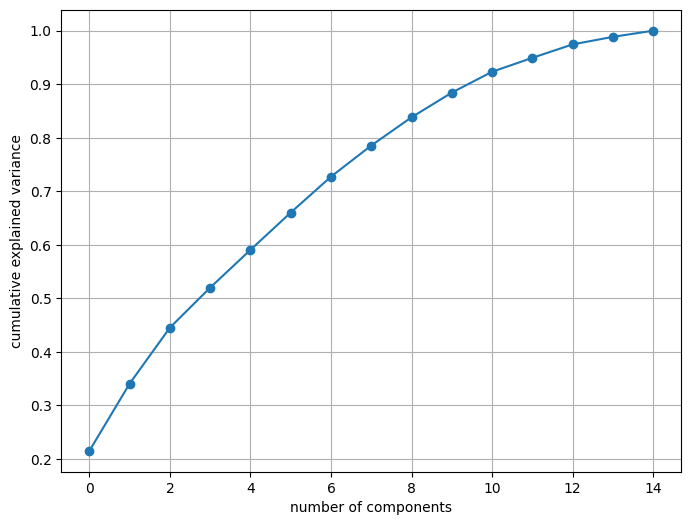

In [292]:
#determine what's the best number of dimensions should retain

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#standardize the feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA()

pca_full = PCA().fit(x_scaled)
plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_),marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

to explain at least 95% of the variance, we need 11 components.

However with original 14 columns as predictors, it is not meaningful to reduce to 11 components as it increases the complexity of interpretation.

In [293]:
import sklearn.decomposition as sd

In [294]:
pca = sd.PCA(n_components=11)
d_reduced = pca.fit_transform(data)

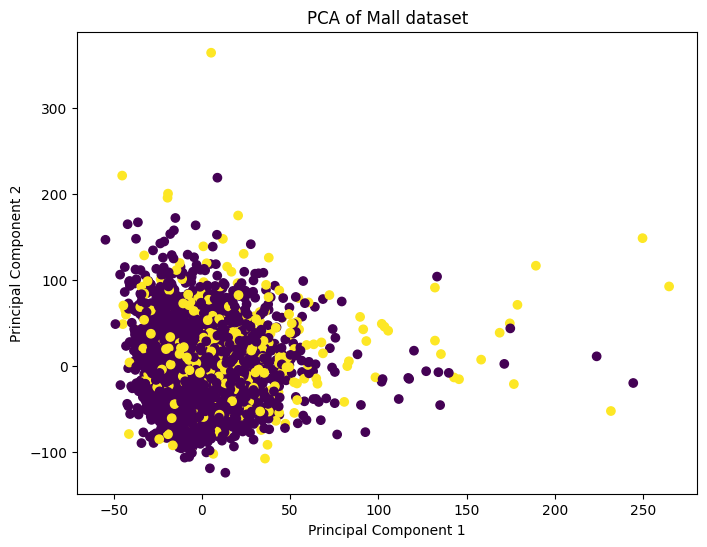

In [295]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(d_reduced[:, 1], d_reduced[:, 0],c = y,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mall dataset')
plt.show()

In [296]:
pca =sd.PCA(n_components=3)
d_reduced = pca.fit_transform(data)
df = pd.DataFrame(data,columns = data.columns)
#add columns for the reduced data
df['PC1'] = d_reduced[:,0]
df['PC2']  =d_reduced[:,1]
df['PC3']  =d_reduced[:,2]

In [297]:
import plotly.express as px

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',color=y)
fig.show()

# K-Means Clustering

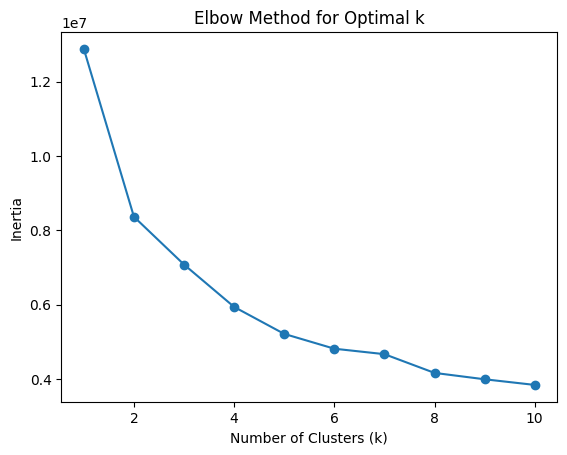

In [298]:
#what is the best k means clustering group

from sklearn.cluster import KMeans
#find the optimal number of clusters
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)

#plot the elbow method
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [299]:
#run k means clustering

# Fit K-Means with the chosen number of clusters (e.g., 2)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add cluster assignments to the original DataFrame
data['Cluster'] = cluster_assignments

# Analyze the characteristics of each cluster
print(data.groupby('Cluster').mean())


             male        age  education  currentSmoker  cigsPerDay    BPMeds  \
Cluster                                                                        
0        0.344340  52.696541   1.911950       0.426101    7.929245  0.075472   
1        0.469225  46.366401   2.007965       0.519913    9.572773  0.013034   
2        0.460647  51.028066   1.982306       0.487492    8.982306  0.027456   

         prevalentStroke  prevalentHyp  diabetes     totChol       sysBP  \
Cluster                                                                    
0               0.009434      0.449686  0.044025  305.468553  141.330189   
1               0.005069      0.185373  0.015206  194.745836  124.407314   
2               0.004881      0.364246  0.030506  245.751068  135.597926   

             diaBP        BMI  heartRate    glucose  TenYearCHD  
Cluster                                                          
0        86.555818  26.597877  77.000000  84.871069    0.205975  
1        79.139030  

In [300]:
#counts of each cluster

# Count the number of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Print the cluster counts
print(cluster_counts)


Cluster
2    1639
1    1381
0     636
Name: count, dtype: int64


In [301]:
#crosstab of cluster and TenYearCHD

pd.crosstab(data['Cluster'], data['TenYearCHD'])


TenYearCHD,0,1
Cluster,,
0,505,131
1,1225,156
2,1369,270


In [302]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Cluster'],
      dtype='object')

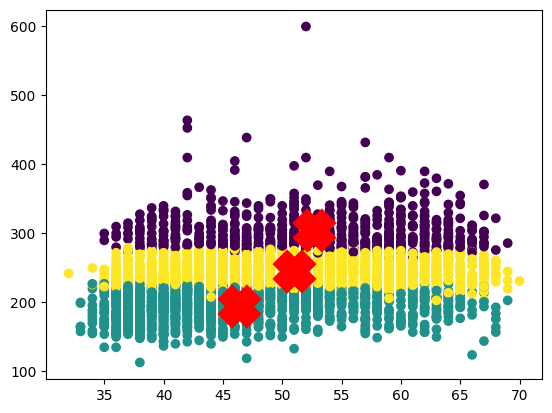

In [303]:
xs = data["age"]
ys = data["totChol"]
centroids = kmeans.cluster_centers_
# plt.xlabel("Age")
# plt.ylabel("Spending score")
plt.scatter(xs,ys,c=data['Cluster'])
plt.scatter(centroids[:,1],centroids[:,9],marker = 'x',linewidth=15,s=450,c='red')
plt.show()

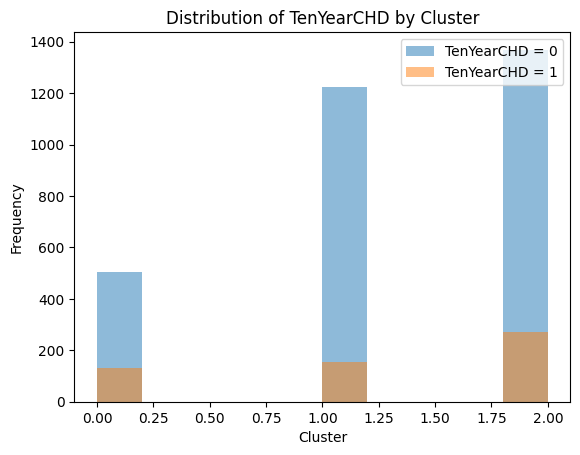

In [304]:
#plot the data with label of TenYearCHD with histogram

plt.hist(data[data['TenYearCHD'] == 0]['Cluster'], alpha=0.5, label='TenYearCHD = 0')
plt.hist(data[data['TenYearCHD'] == 1]['Cluster'], alpha=0.5, label='TenYearCHD = 1')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of TenYearCHD by Cluster')
plt.show()


There are more heart diseases in the third cluster but the first cluster have the worst ratio

#Random Forest Classifier

In [305]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=150,max_samples = 0.5, random_state=52, oob_score = True)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=150, oob_score=True,
                       random_state=52)

In [306]:
rfc.oob_score_

0.8464243845252052

In [307]:
y_pred = rfc.predict(x_test)

In [308]:
#show accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8514129443938013

In [309]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[927   3]
 [160   7]]


 Confusion matrix from log reg. <br>
 [[603   7]<br>
 [113   9]]

Text(50.722222222222214, 0.5, 'Observed')

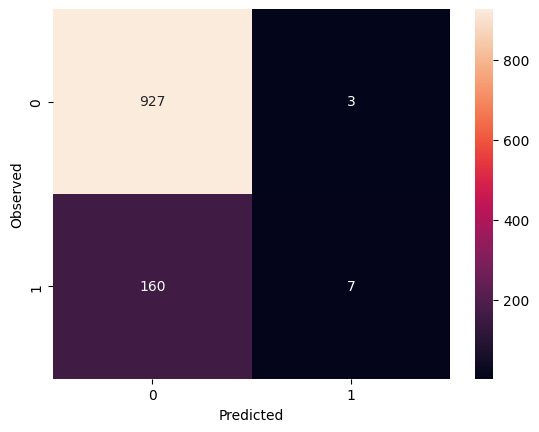

In [310]:
sns.heatmap(cm, annot=True,fmt='.0f')

plt.xlabel('Predicted')
plt.ylabel('Observed')

Log Reg accuracy = 0.8360655737704918 <br>
KNN score = 0.8422971741112124 <br>
Random Forest Classifier accuracy score = 0.8514129443938013 <br>




In [311]:
#show type i and type ii error

# Extract true positives, false positives, etc. from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate Type I error (False Positive Rate)
type_i_error = fp / (fp + tn)

# Calculate Type II error (False Negative Rate)
type_ii_error = fn / (fn + tp)

print("Type I Error (False Positive Rate):", type_i_error)
print("Type II Error (False Negative Rate):", type_ii_error)


Type I Error (False Positive Rate): 0.0032258064516129032
Type II Error (False Negative Rate): 0.9580838323353293


# II

continue

#Importing Data and Cleaning Data

In [312]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #this is just to separate test and train data
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import tree

from google.colab import drive
drive.mount('/content/drive')
insurance_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
print (insurance_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      age     sex    bmi         ranking  children smoker     region   charges
0      19  female  27.90      overweight         0    yes  southwest  16884.92
1      18    male  33.77         obesity         1     no  southeast   1725.55
2      28    male  33.00         obesity         3     no  southeast   4449.46
3      33    male  22.71  healthy weight         0     no  northwest  21984.47
4      32    male  28.88      overweight         0     no  northwest   3866.86
...   ...     ...    ...             ...       ...    ...        ...       ...
1332   50    male  30.97         obesity         3     no  northwest  10600.55
1333   18  female  31.92         obesity         0     no  northeast   2205.98
1334   18  female  36.85         obesity         0     no  southeast   1629.83
1335   21  female  25.80      overweight         0     no  southwest   2007.95
13

Data from an insurance that contains clients information

In [313]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   ranking   1328 non-null   object 
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   object 
 6   region    1337 non-null   object 
 7   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


In [314]:
#remove rows with missing values

insurance_df = insurance_df.dropna()
print (insurance_df)


      age     sex    bmi         ranking  children smoker     region   charges
0      19  female  27.90      overweight         0    yes  southwest  16884.92
1      18    male  33.77         obesity         1     no  southeast   1725.55
2      28    male  33.00         obesity         3     no  southeast   4449.46
3      33    male  22.71  healthy weight         0     no  northwest  21984.47
4      32    male  28.88      overweight         0     no  northwest   3866.86
...   ...     ...    ...             ...       ...    ...        ...       ...
1332   50    male  30.97         obesity         3     no  northwest  10600.55
1333   18  female  31.92         obesity         0     no  northeast   2205.98
1334   18  female  36.85         obesity         0     no  southeast   1629.83
1335   21  female  25.80      overweight         0     no  southwest   2007.95
1336   61  female  29.07      overweight         0    yes  northwest  29141.36

[1328 rows x 8 columns]


In [315]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   object 
 2   bmi       1328 non-null   float64
 3   ranking   1328 non-null   object 
 4   children  1328 non-null   int64  
 5   smoker    1328 non-null   object 
 6   region    1328 non-null   object 
 7   charges   1328 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.4+ KB


In [316]:
#get unique values of columns with object

for col in insurance_df.select_dtypes(include=['object']):
  print(f"Unique values in column '{col}': {insurance_df[col].unique()}")


Unique values in column 'sex': ['female' 'male']
Unique values in column 'ranking': ['overweight' 'obesity' 'healthy weight' 'underweight']
Unique values in column 'smoker': ['yes' 'no']
Unique values in column 'region': ['southwest' 'southeast' 'northwest' 'northeast']


In [317]:
#relabel these columns with object into numerical values

insurance_df['sex'] = insurance_df['sex'].map({'male': 1, 'female': 0})
insurance_df['ranking'] = insurance_df['ranking'].map({'overweight': 0, 'obesity': 1, 'healthy weight': 2, 'underweight': 3})

insurance_df['smoker'] = insurance_df['smoker'].map({'yes': 1, 'no': 0})
insurance_df['region'] = insurance_df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   bmi       1328 non-null   float64
 3   ranking   1328 non-null   int64  
 4   children  1328 non-null   int64  
 5   smoker    1328 non-null   int64  
 6   region    1328 non-null   int64  
 7   charges   1328 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 93.4 KB


# Linear Regression

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [319]:
#define x and y

#select all columns except close for x, and close = y

x = insurance_df.loc[:,insurance_df.columns !='charges']
y = insurance_df['charges']

In [320]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   bmi       1328 non-null   float64
 3   ranking   1328 non-null   int64  
 4   children  1328 non-null   int64  
 5   smoker    1328 non-null   int64  
 6   region    1328 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 83.0 KB


In [321]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1328 entries, 0 to 1336
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1328 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [322]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [323]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print (y_pred)

[ 7955.55398263 18329.468694   10316.66928241  7477.02229388
  3984.34122735 13419.28055584  7977.63467654 10807.01517328
  4981.34729658 17051.79581978  2675.44156561  6444.76560185
  7285.0563879  32599.06565549  4966.03301622  5543.30417937
  4193.19868078  5454.0530802  10679.28622002  9148.59306122
 15201.12054638  3329.66146593  8368.72574693 33455.06920301
  5605.69598746 12883.25739007  9781.72779103 35035.71734418
  9064.57291879 28618.55456504  7877.9008632  30784.53588591
  4464.29554067 36634.56205695 29941.37215457  7660.67092371
  6504.48317453  4662.47442003 13987.97931304 36403.91170058
  5237.8971299  24619.02771126  7298.85226526  5536.81935471
 10708.61206623 11497.8951418  15066.32325386 14988.32515151
  7345.02659066 34513.51486824  1513.21050445  2839.48256079
  7604.11701544 34587.51987652 30227.98815861  3156.90373229
  2558.2243335  13817.19877093 10818.65226203  3756.15815017
 12319.36882646 10429.02708431 13007.52923423 12585.23962554
  4555.49240458  8144.31

In [324]:
y_pred.shape

(399,)

In [325]:
#show coefficients next to each column name

pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])


,Coefficient
age,249.424275
sex,-28.081345
bmi,315.327622
ranking,446.181453
children,427.397185
smoker,23699.974652
region,418.678305


Smoking have a strong impacts on charges and Women have less charges.

In [326]:
# prompt: show r2 score with significance test table

print('R^2:',metrics.r2_score(y_test, y_pred))
model = sm.OLS(y, x).fit()
print(model.summary())


R^2: 0.7796077858623087
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1304.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        00:30:57   Log-Likelihood:                         -13522.
No. Observations:                1328   AIC:                                  2.706e+04
Df Residuals:                    1321   BIC:                                  2.710e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

R-square should be near 1 but here it's not close enough.

#ML based on linear regression

In [327]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size = 0.3)

from sklearn.linear_model import LinearRegression # Import the LinearRegression class

reg = LinearRegression()
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

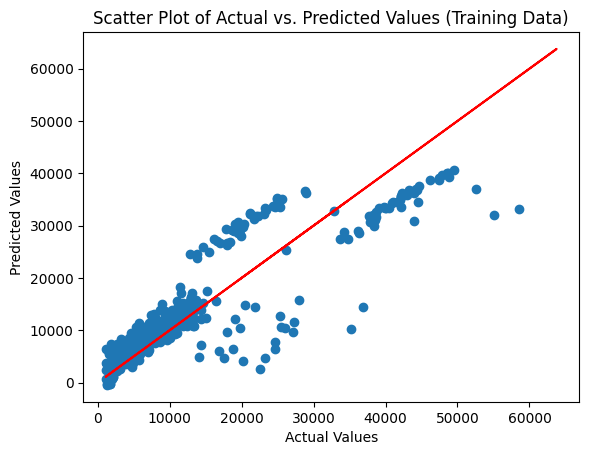

In [328]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot(y_train, y_train, color='red') #the line is x=y, assuming predicted y = actual y
#an indicator of how well the model performs.
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values (Training Data)')
plt.show()

here our model overestimates when the charges are higher than 15k, when the charges are above 40k it underevaluates.
The reason could be that the variables can lead to separation of the population by groups but the relation between the target and the variables is not captured by the model so it's not accurate.

In [329]:
# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 35617142.10570631
R-squared: 0.7796077858623089


In [330]:
#show reg.coef_ of the model with significant test with necessary library import

# Fit the OLS model
model = sm.OLS(y_train, x_train).fit()

# Print the summary of the model, including p-values
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     366.6
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          3.44e-261
Time:                        00:30:57   Log-Likelihood:                -9414.1
No. Observations:                 929   AIC:                         1.884e+04
Df Residuals:                     921   BIC:                         1.888e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.244e+04   1293.989     -9.617      0.0

#Random Forest Regressor

In [331]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size = 0.3)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=150, max_samples=0.6, random_state=42,oob_score=True,max_features='sqrt')

In [332]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.6, n_estimators=150,
                      oob_score=True, random_state=42)

In [333]:
rfr.oob_score_

0.810545666290526

In [334]:
y_rfr_pred = rfr.predict(x_test) #prediction bsed on the test sample (20% of the whole data from train_test)

In [335]:
print ("Train r2 score",r2_score(y_train,rfr.predict(x_train)))
print ("Test r2 score",r2_score(y_test,y_rfr_pred))

Train r2 score 0.9421256970177705
Test r2 score 0.8600962039857406


means Training set is slightly overfitted. <br>
Hence Testing set R2 is way smaller.
<br>
<br>

Linear regression, R2 =  0.751 (Whole data) <br>
Random Forest, R2 = 0.87 (Test) <br>

In [336]:
y_rfr_pred

array([ 6535.52546667, 14423.28026667, 10604.55086667,  7162.0718    ,
        4314.98266667, 12424.19513333,  6901.26653333, 11712.7568    ,
        2609.29953333, 13457.20846667,  5351.02233333,  5188.82266667,
        6915.0526    , 37516.9226    ,  4652.19866667,  5378.92526667,
        8151.5836    ,  7618.99366667, 11438.12626667,  8151.95926667,
       13881.1464    ,  3779.70426667,  8039.841     , 36345.46753333,
        2984.363     , 10801.85146667,  7082.5134    , 22902.25026667,
       12011.211     , 32789.76113333,  9096.53973333, 21314.77633333,
        5893.6222    , 24459.77653333, 35667.15393333,  8558.17786667,
       10201.9032    ,  4604.32226667, 15302.17813333, 38114.34993333,
        6671.71333333, 15725.9442    ,  5031.33306667, 11581.92006667,
       12040.29866667, 11467.6314    , 16491.54446667, 12255.9414    ,
        5346.2614    , 37946.59013333,  3004.8558    ,  5983.48686667,
       10231.53333333, 35100.7034    , 18640.0904    ,  6468.22513333,
      

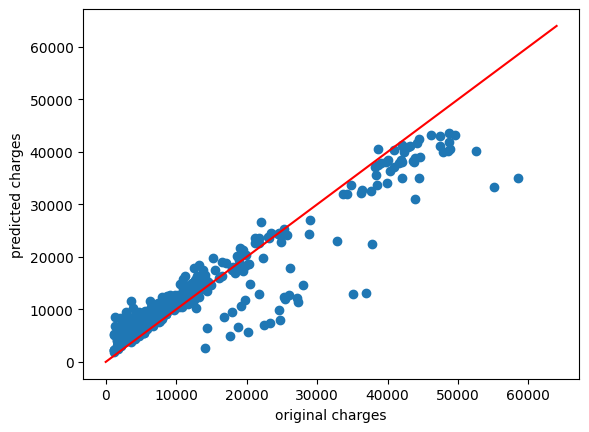

In [337]:
plt.scatter(y_test,y_rfr_pred)
plt.plot([0,1000,2000,3000,4000,64000],[0,1000,2000,3000,4000,64000],c='red')
plt.xlabel('original charges')
plt.ylabel('predicted charges')
plt.show()

In [338]:
importances  = rfr.feature_importances_

In [339]:
indices = np.argsort(importances)
indices

array([0, 2, 7, 5, 4, 3, 1, 6])

In [340]:
indices = np.argsort(importances)[::-1]
indices

array([6, 1, 3, 4, 5, 7, 2, 0])

In [341]:
features = x_train.columns
features

Index(['const', 'age', 'sex', 'bmi', 'ranking', 'children', 'smoker',
       'region'],
      dtype='object')

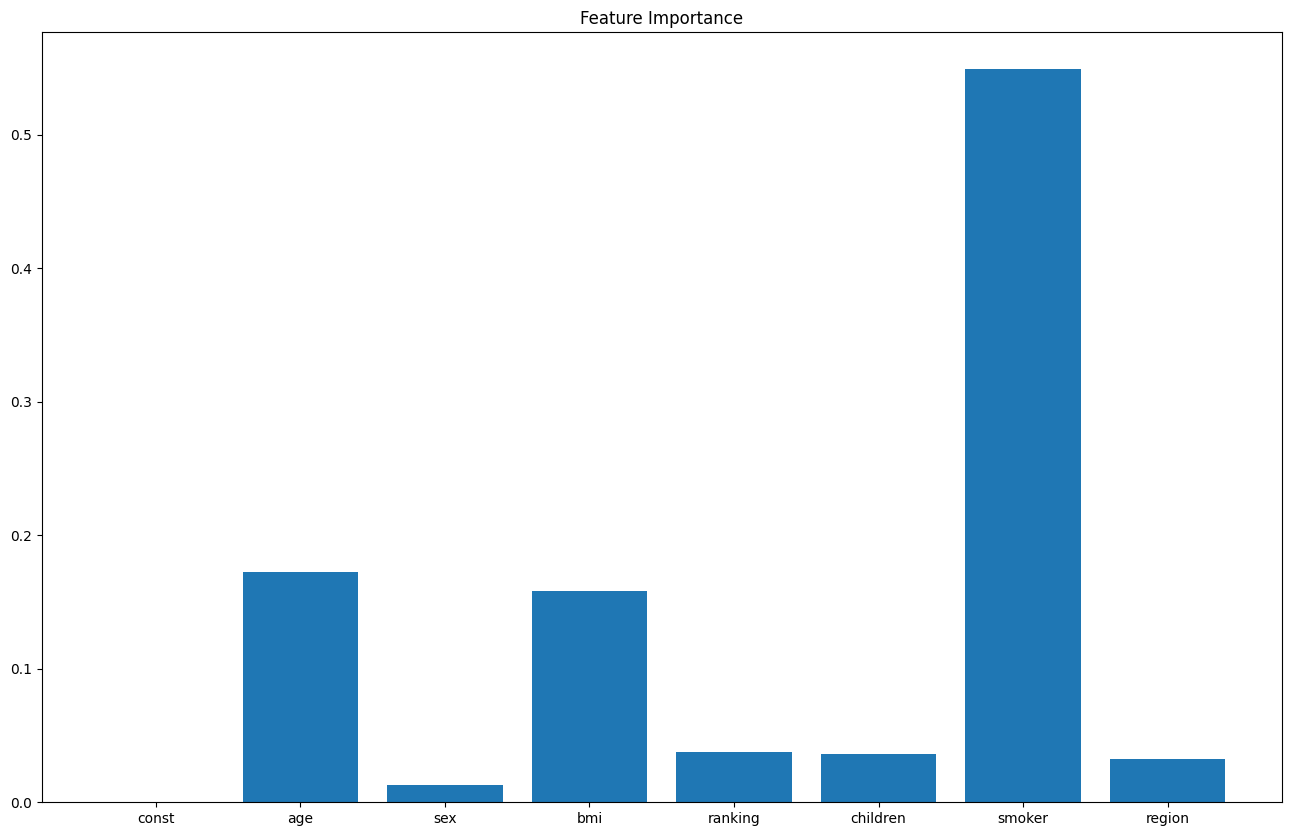

In [342]:
plt.figure(figsize=(16,10))
plt.title('Feature Importance')
plt.bar(features,importances)
plt.show()

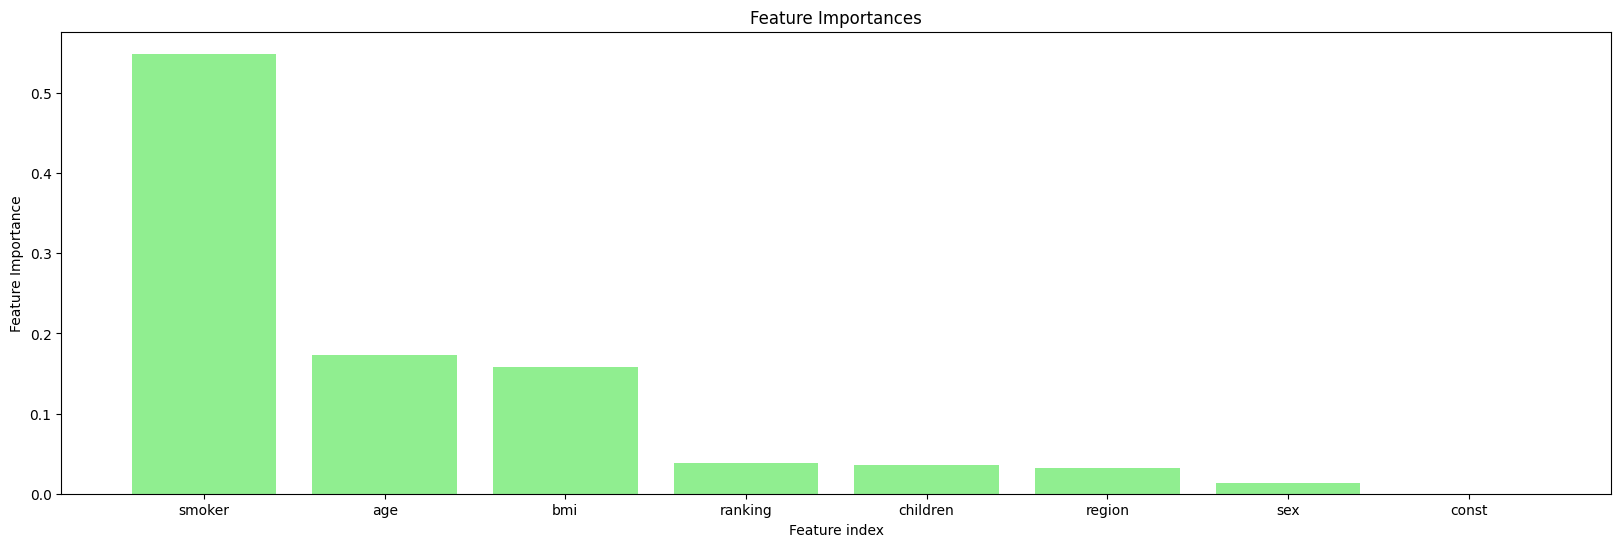

In [343]:
plt.figure(figsize=(20,6))
plt.title('Feature Importances')
plt.bar(x.columns[indices],importances[indices],color='lightgreen')
plt.xlabel('Feature index')
plt.ylabel('Feature Importance')
plt.show()

It shows that smoking is 3 times more important than age and bmi in increasing the charges.